In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline
data = pd.read_csv("Weather.csv" ,nrows=200)
data.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180,83.9


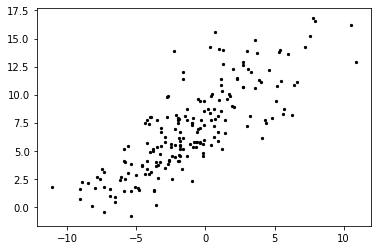

In [2]:
import numpy as np
f1 = data["min_temp"].values
f2 = data["max_temp"].values
# X = np.array(list(zip(f1, f2)))
X = np.vstack((f1,f2)).T
plt.scatter(f1,f2,c="black",s=5)

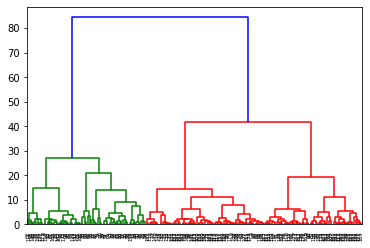

In [3]:
from scipy.cluster import hierarchy
den = hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))

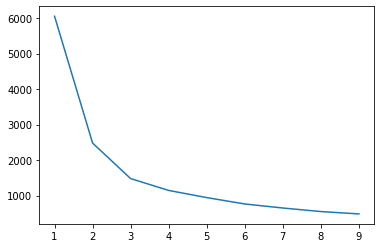

In [4]:
err = []
for i in range(1,10):
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(X)
    err.append(km.inertia_)
plt.plot(range(1,10),err)

20000
[[-1.80725675  7.39397982]
 [20.79176002 29.03729151]
 [10.0324055  19.80697595]]


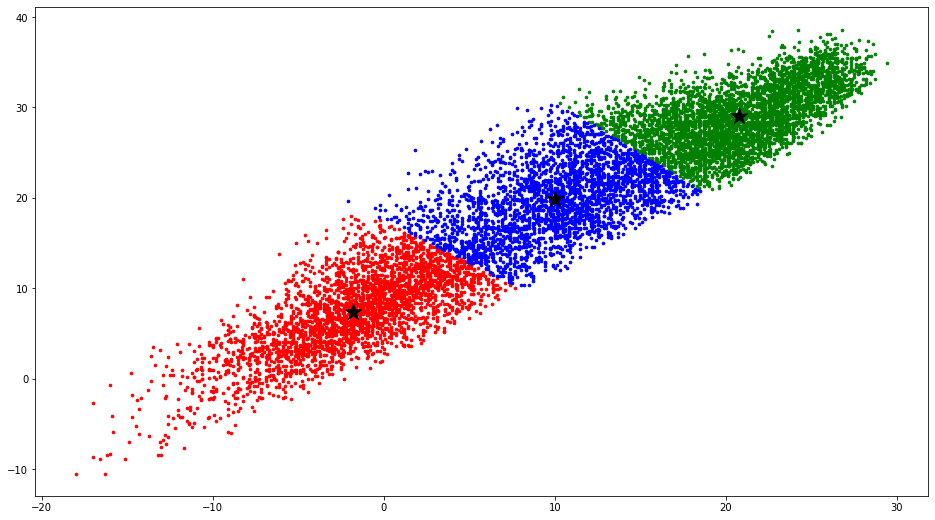

In [3]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = pd.read_csv("Weather.csv",nrows=10000)
f1 = data["min_temp"].values
f2 = data["max_temp"].values
# X = np.array(list(zip(f1, f2)))
X = np.vstack((f1,f2)).T
print(X.size)
k=3
plt.rcParams["figure.figsize"]=(16,9)
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
cls = kmeans.predict(X)
C = kmeans.cluster_centers_
print(C)
colors = ['r','g','b','y','c','m']
fig,ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if cls[j] == i ])
    ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
ax.scatter(C[:,0],C[:,1], marker="*", s=300, c="#050505")